In [14]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import matplotlib.animation as animation

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [15]:
# Constantes del sistema 
w= 2.6617e-6 #Frecuencia angular de la luna 
G = 6.67e-11 #Constante de gravitación
mt = 5.9736e24 #masa tierra
rt = 6.3781e6 #radio tierra
ml = 0.07349e24 #masa luna
rl = 1.7374e6 #radio luna
d = 3.844e8 # distancia tierra luna

In [16]:
Delta = G*mt/(d**3) #Conversion de G 
mu = ml/mt #Masa normalizada de la luna
#Distancia Tierra-Luna
def rTL(r,phi,t):
    rTL = np.sqrt(1+r**2-2*r*np.cos(phi-w*t))
    return rTL

In [17]:
# Valores del Hamiltoniano
#Posicion del cohete
def r_(r,phi,pr,pphi,t):
    return pr
#Angulo del cohete
def phi_(r,phi,pr,pphi,t):
    return pphi/r**2
#Momento lineal
def pr_(r,phi,pr,pphi,t):
    return pphi**2/r**3 - Delta*(1/r**2 + mu/(rTL(r,phi,t)+1e-9)**3*(r-np.cos(phi-w*t)))
#Momento angular
def pphi_(r,phi,pr,pphi,t):
    return - Delta*mu*r*np.sin(phi-w*t)/(rTL(r,phi,t)+1e-9)**3

In [18]:
# Condiciones iniciales de momento
def pr0(v,theta,phi):
    return v*np.cos(theta-phi)
def pphi0(r,v,theta,phi):
    return r*v*np.sin(theta-phi)

In [19]:
#Valores iniciales
r0 = rt
phi0 = 0./180.*np.pi 
theta0 = 25/180.*np.pi
v0 = 11100 #Velocidad de escape aproximada
pr0 = pr0(v0/d,theta0,phi0)
pphi0 = pphi0(r0/d, v0/d,theta0,phi0)
Inicial = [r0/d,phi0,pr0,pphi0]

In [20]:
def GetRungeKutta4(Inicial,t0,tf,h):
    N =int((tf-t0)/h)+1    
    t = np.linspace(t0,tf,N)
    r = np.zeros([N])
    phi = np.zeros([N])
    pr = np.zeros([N])
    pphi = np.zeros([N])

    r[0] = Inicial[0]
    phi[0] = Inicial[1]
    pr[0] = Inicial[2]
    pphi[0] = Inicial[3]
    
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    K3 = np.zeros(4)
    K4 = np.zeros(4)
    
    correction = True
    
    for i in tqdm(range(1, N)):
        
        K1[0] = h*r_(r[i-1],phi[i-1],pr[i-1],pphi[i-1],t[i-1])
        K1[1] = h*phi_(r[i-1],phi[i-1],pr[i-1],pphi[i-1],t[i-1])
        K1[2] = h*pr_(r[i-1],phi[i-1],pr[i-1],pphi[i-1],t[i-1])
        K1[3] = h*pphi_(r[i-1],phi[i-1],pr[i-1],pphi[i-1],t[i-1])
        
        K2[0] = h*r_(r[i-1] + 0.5*K1[0],phi[i-1] + 0.5*K1[1],pr[i-1] + 0.5*K1[2],pphi[i-1] + 0.5*K1[3],t[i-1] + 0.5)
        K2[1] = h*phi_(r[i-1] + 0.5*K1[0],phi[i-1] + 0.5*K1[1],pr[i-1] + 0.5*K1[2],pphi[i-1] + 0.5*K1[3],t[i-1] + 0.5)
        K2[2] = h*pr_(r[i-1] + 0.5*K1[0],phi[i-1] + 0.5*K1[1],pr[i-1] + 0.5*K1[2],pphi[i-1] + 0.5*K1[3],t[i-1] + 0.5)
        K2[3] = h*pphi_(r[i-1] + 0.5*K1[0],phi[i-1] + 0.5*K1[1],pr[i-1] + 0.5*K1[2],pphi[i-1] + 0.5*K1[3],t[i-1] + 0.5)
        
        K3[0] = h*r_(r[i-1] + 0.5*K2[0],phi[i-1] + 0.5*K2[1],pr[i-1] + 0.5*K2[2],pphi[i-1] + 0.5*K2[3],t[i-1] + 0.5)
        K3[1] = h*phi_(r[i-1] + 0.5*K2[0],phi[i-1] + 0.5*K2[1],pr[i-1] + 0.5*K2[2],pphi[i-1] + 0.5*K2[3],t[i-1] + 0.5)
        K3[2] = h*pr_(r[i-1] + 0.5*K2[0],phi[i-1] + 0.5*K2[1],pr[i-1] + 0.5*K2[2],pphi[i-1] + 0.5*K2[3],t[i-1] + 0.5)
        K3[3] = h*pphi_(r[i-1] + 0.5*K2[0],phi[i-1] + 0.5*K2[1],pr[i-1] + 0.5*K2[2],pphi[i-1] + 0.5*K2[3],t[i-1] + 0.5)
        
        K4[0] = h*r_(r[i-1]+K3[0],phi[i-1]+K3[1],pr[i-1]+K3[2],pphi[i-1]+K3[3],t[i-1]+h)
        K4[1] = h*phi_(r[i-1]+K3[0],phi[i-1]+K3[1],pr[i-1]+K3[2],pphi[i-1]+K3[3],t[i-1]+h)
        K4[2] = h*pr_(r[i-1]+K3[0],phi[i-1]+K3[1],pr[i-1]+K3[2],pphi[i-1]+K3[3],t[i-1]+h)
        K4[3] = h*pphi_(r[i-1]+K3[0],phi[i-1]+K3[1],pr[i-1]+K3[2],pphi[i-1]+K3[3],t[i-1]+h)
        
        r[i] = r[i-1]+(K1[0]+2*K2[0]+2*K3[0]+K4[0])/(6)
        phi[i] = phi[i-1]+(K1[1]+2*K2[1]+2*K3[1]+K4[1])/(6)
        pr[i] = pr[i-1]+(K1[2]+2*K2[2]+2*K3[2]+K4[2])/(6)
        pphi[i] = pphi[i-1]+(K1[3]+2*K2[3]+2*K3[3]+K4[3])/(6)
        
        d = np.sqrt( (r[i]*np.cos(phi[i])+np.cos(w*t[i]))**2 + (r[i]*np.sin(phi[i]) - np.sin(w*t[i]))**2)#D Tierra-luna
        #Perdida de energía
        if (d < 0.1 and correction == True):
            pr[i] = 0.7*pr[i]
            correction = False
            
    return t,r,phi
    

In [21]:
t1, r1, phi1 = GetRungeKutta4(Inicial, 0, 6.7e5, 10)

100%|██████████| 67000/67000 [01:34<00:00, 705.32it/s] 


In [24]:
t = []
r = []
phi = []
for i in range(len(t1)):
    if i%1000 == 0:
        t.append(t1[i])
        r.append(r1[i])
        phi.append(phi1[i])  
t = np.array(t)
r = np.array(r)
phi = np.array(phi)

In [25]:
#Posicion de la nave
x, y = r*np.cos(phi), r*np.sin(phi)
#Posicion de la luna
xL, yL = np.cos(w*t), np.sin(w*t)

<IPython.core.display.Javascript object>


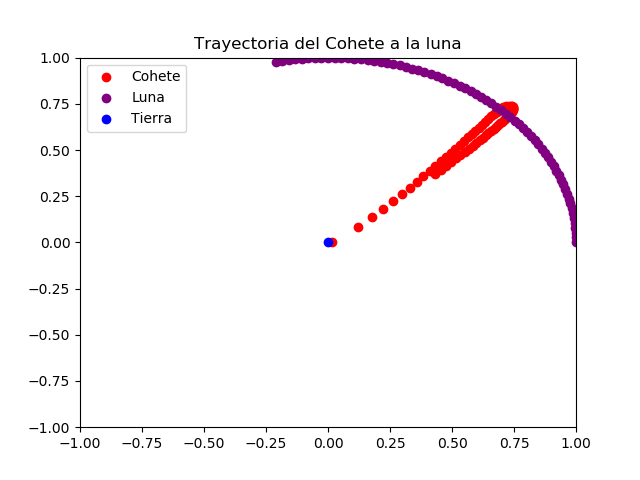

In [26]:
fig0 = plt.figure()
plt.scatter(x,y, color = 'r',label='Cohete')
plt.scatter(xL,yL, color = 'purple', label='Luna')
plt.scatter(0,0, color= 'b', label='Tierra')
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.title("Trayectoria del Cohete a la luna")
plt.legend()

<IPython.core.display.Javascript object>


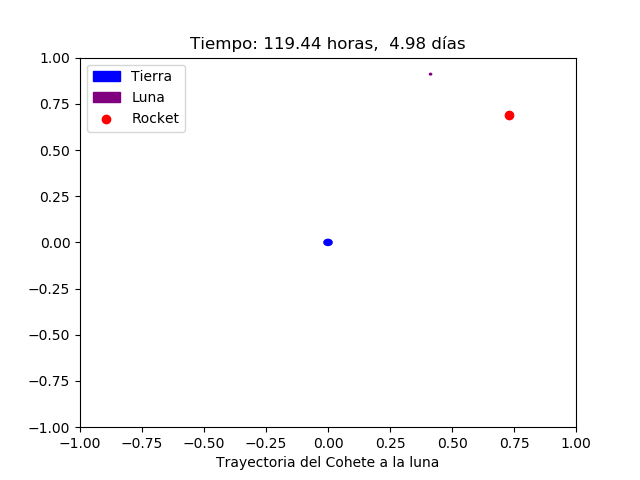

In [27]:
Nframes = len(t)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("Trayectoria del Cohete a la luna")
    
    
def animacion(i):
    plot = ax.clear()
    init()
    plot= ax.set_title(f"Tiempo: {t[i]/3600.:.2f} horas,  {t[i]/3600./24.:.2f} días"  )
    Tierra = plt.Circle((0,0), rt/d, color = 'b', label = 'Tierra')
    Luna = plt.Circle((xL[i], yL[i]), rl/d, color='purple', label = 'Luna')
    
    plot = ax.add_patch(Tierra)
    plot = ax.add_patch(Luna)
    
    plot = ax.scatter(x[i], y[i], c = 'r', label = 'Rocket')
    
    plot = plt.legend(loc = 0)
    
    return plot

Animation = animation.FuncAnimation(fig, animacion, frames = Nframes, init_func=init)

